# K MEANS CLUSTERING 

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Hopkins statistics to check clustering tendency 
5. Modelling
6. Final analysis and recommendations

In [1]:
# import the required libraries 
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import datetime as dt 

import sklearn 
from sklearn.preprocessing import StandardScaler

## STEP 1: Read and Understand the data 

In [2]:
# import the csv file 
retail_df = pd.read_csv("Online+Retail.csv", encoding = 'latin1')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [4]:
# understand the data 
retail_df.shape

(541909, 8)

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


here some columns have null values 

# STEP 2: Data Cleaning 

In [6]:
# identify the null values 
retail_df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [7]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# percentage of missing vals 
round((retail_df.isnull().sum()/len(retail_df) *100),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

 we cant drop the CustomerId column as it is important for the customer segmentation so we would anyhow have to drop the 25% rows 

In [9]:
# dropping the null values 
retail_df = retail_df.dropna()
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
retail_df.shape

(406829, 8)

In [11]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# STEP 3: Data preparation 

Using RFM analysis to segment customers based on buing behaviours and target them with right stratergies 
 - R (recency): number of days since last transaction 
 - F (frequency): number of transactions made by the customer 
 - M (monetary): total amount of transactions (revenue contributed)

In [12]:
# create a new column as amount 
retail_df['Amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [13]:
retail_df.shape

(406829, 9)

In [14]:
# for RFM analysis we need to create a new df with columns for R,F and M
# creating monetory column using CustomerId and Amount 
retail_df.groupby('CustomerID')['Amount'].sum()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [15]:
# covert this series into df and reset indexes 
grouped_df = retail_df.groupby('CustomerID')['Amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [16]:
# creating frequency column 
freq = retail_df.groupby('CustomerID')['InvoiceNo'].count()
freq = freq.reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [17]:
# merge the two dfs 
grouped_df = pd.merge(grouped_df, freq , on='CustomerID', how = 'inner')
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [18]:
# check the date time column dtype 
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [19]:
retail_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [20]:
# convert it into datetime format 
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'] , format ='%d-%m-%Y %H:%M' )
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [21]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
# create a new column for the difference between the recent date and transaction made 
max_date = retail_df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [23]:
# create a new column to check recency 
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [24]:
# create the recency column by finding the min in diff column 
rec = retail_df.groupby('CustomerID')['diff'].min()
rec = rec.reset_index()
rec.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [25]:
# merge this to the grouped_df
grouped_df = pd.merge(grouped_df, rec, on= 'CustomerID', how= 'inner')
grouped_df.head()

,CustomerID,Amount,Frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [26]:
# rename the columns 
grouped_df.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [27]:
# update the recency col and remove the time 
grouped_df['Recency'] = grouped_df['Recency'].dt.days
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## Data prepatation : Outlier treatment 

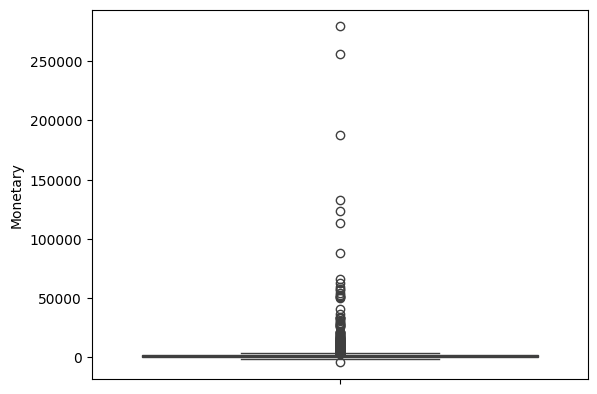

In [28]:
# identify the outlier for each column 
sns.boxplot(grouped_df['Monetary'])
plt.show()

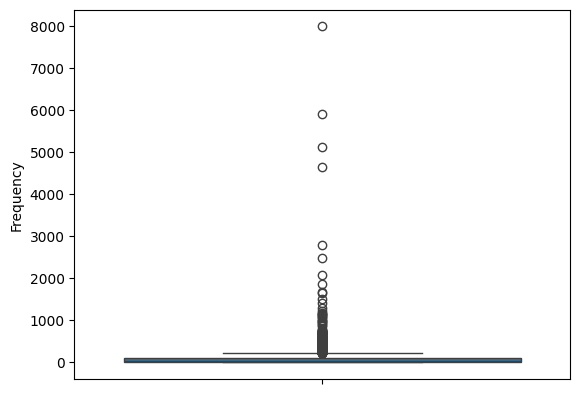

In [29]:
sns.boxplot(grouped_df['Frequency'])
plt.show()

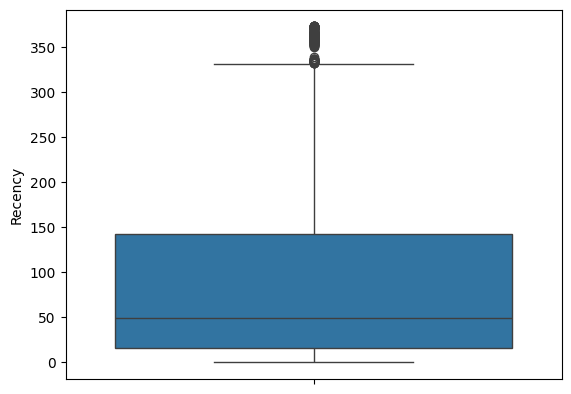

In [30]:
sns.boxplot(grouped_df['Recency'])
plt.show()

<b>Two types to define outliers :</b>
- statistical method
- domain specific method 


In [31]:
# removing outliers using statistical method
# outlier treatment fro monetary 
Q1 = grouped_df.Monetary.quantile(0.05)
Q3 = grouped_df.Monetary.quantile(0.95)
IQR = Q3 - Q1 
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
grouped_df = grouped_df[(grouped_df.Monetary >= LB )&(grouped_df.Monetary <= UB)]

#outlier treatment for frequency 
Q1 = grouped_df.Frequency.quantile(0.05)
Q3 = grouped_df.Frequency.quantile(0.95)
IQR = Q3 - Q1 
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
grouped_df = grouped_df[(grouped_df.Frequency >= LB )&(grouped_df.Frequency <= UB)]

# out;ier treatment for recency 
Q1 = grouped_df.Recency.quantile(0.05)
Q3 = grouped_df.Recency.quantile(0.95)
IQR = Q3 - Q1 
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
grouped_df = grouped_df[(grouped_df.Recency >= LB )&(grouped_df.Recency <= UB)]


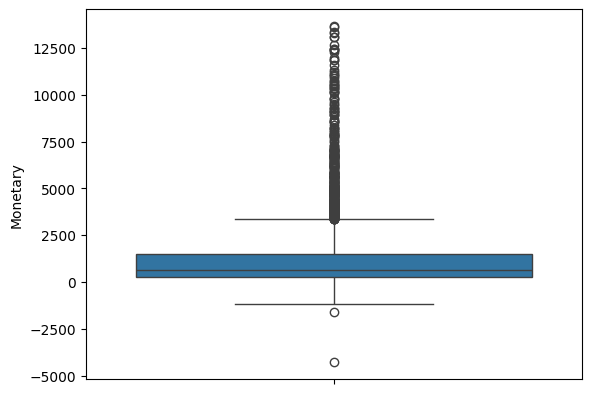

In [32]:
sns.boxplot(grouped_df.Monetary)
plt.show()

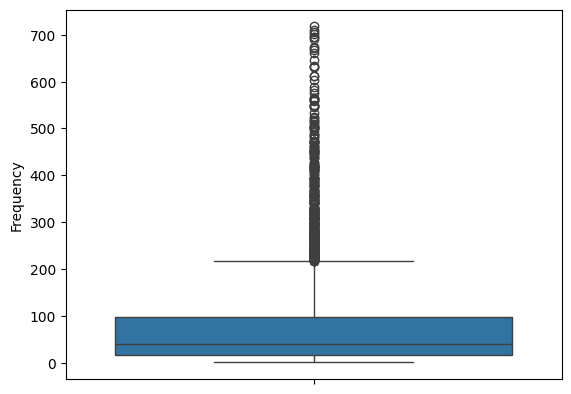

In [33]:
sns.boxplot(grouped_df.Frequency)
plt.show()

## Data preparation : Rescaling the features using standar scaler

In [34]:
# rescaling the values using standardization (we dont need customer id for clustering )
rfm_df = grouped_df[['Recency', 'Frequency', 'Monetary']]

# instatiate the scaler 
scaler = StandardScaler()

# fit and tranform the data using scaler  
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[ 2.30161144, -0.75288754, -0.72373821],
       [-0.90646561,  1.04246665,  1.73161722],
       [-0.18365813, -0.46363604,  0.30012791],
       ...,
       [ 0.86589794, -0.70301659, -0.67769602],
       [-0.84705678, -0.64317145, -0.6231313 ],
       [-0.50050524, -0.07464263,  0.32293822]])

In [35]:
# convert this np array into a df 
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,2.301611,-0.752888,-0.723738
1,-0.906466,1.042467,1.731617
2,-0.183658,-0.463636,0.300128
3,-0.738141,-0.044720,0.277517
4,2.143188,-0.603275,-0.533235


In [36]:
rfm_df_scaled.describe()

,Recency,Frequency,Monetary
count,4.293000e+03,4.293000e+03,4.293000e+03
mean,5.379138e-17,-4.882602e-17,2.648191e-17
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-9.163671e-01,-7.628617e-01,-3.166350e+00
25%,-7.480421e-01,-6.032747e-01,-5.588933e-01
50%,-4.212935e-01,-3.738683e-01,-3.631428e-01
75%,5.193464e-01,1.946605e-01,1.412932e-01
max,2.776882e+00,6.388632e+00,7.068221e+00


<b> The data has now been scaled to have mean 0 and std dev. = 1

# STEP 4: Hopkins statistics 

The Hopkins statistic, is a measure which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.
 - H ~ 0.5 : random data
 - H > 0.5 : not clusterable data
 - H < 0.5 : data is highly clusterable

In [37]:
pip install pyclustertend 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
from pyclustertend import hopkins 

In [39]:
clustering_tendency1 = hopkins(rfm_df_scaled , int(0.1 * rfm_df_scaled.shape[0]))
print(f'The clustering tendency of the data is:{clustering_tendency1}')

The clustering tendency of the data is:0.04896815389851965


In [40]:
clustering_tendency2 = hopkins(rfm_df_scaled , int(0.1 * rfm_df_scaled.shape[0]))
print(f'The clustering tendency of the data is:{clustering_tendency2}')

The clustering tendency of the data is:0.0528351565055312


This is very close to 0.
That means data has a strong clustering tendency.
Also, the data is highly structured and suitable for clustering algorithms .
<br>


<b>On multiple iterations of Hopkins statistic, multiple different values are returned since the algorithm uses some randomisation in the initialisation part of the code. Therefore, it is recommended to run it a couple of times before confirming whether the data is suitable for clustering or not.

# STEP 5: Modelling 

In [41]:
from sklearn.cluster import KMeans

In [42]:
k_means = KMeans(n_clusters = 4, max_iter = 50)
km_model = k_means.fit(rfm_df_scaled)
km_model

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,50
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [43]:
km_model.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [44]:
len(km_model.labels_)

4293

In [45]:
rfm_df_scaled.shape

(4293, 3)

### Finding the optimal number of clusters 
- Elbow method / SSD(sum of sqaured distances)
- Silhouette method 

In [46]:
# elbow method (plot K vs WCSS graph)
wcss = []
range_of_clusters = [2,3,4,5,6,7,8,9,10] # K

# iterate through each value of K and calculate inertia / wcss/ ssd
for i in range_of_clusters:
    k_means_model = KMeans(n_clusters = i, max_iter = 50)
    k_means_model.fit(rfm_df_scaled)

    wcss.append(k_means_model.inertia_)

print(f'The value of wcss for each value of k is: {wcss}')


The value of wcss for each value of k is: [8703.493695588295, 4433.586805811539, 3361.2473491495375, 2802.926418558488, 2392.246183955721, 2039.3574732282618, 1826.1747034083319, 1683.3115742078503, 1468.4822151539424]


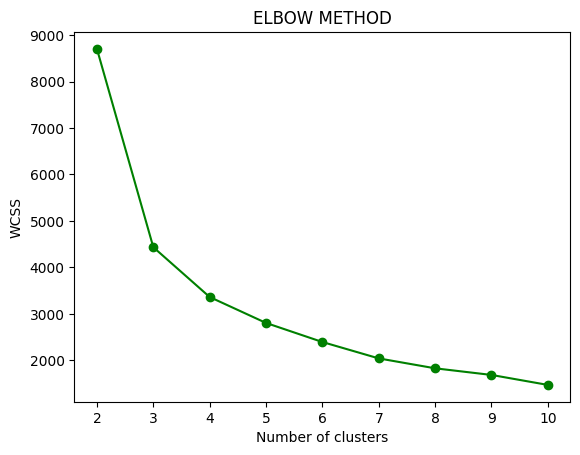

In [47]:
# plot the graph to check the eblow point / optimal value of k 
plt.plot(range_of_clusters, wcss , 'g-o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

<b>From the graph above, the elbow point is 3 which is the optimal value of k 

#### Silhouette Analysis</b>
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$
$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.
* The value of the silhouette score range lies between -1 to 1. 
* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 
* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
range_of_clusters = [2,3,4,5,6,7,8,9,10]
ss = []
for i in range_of_clusters:
    # insitailise kmeans
    k_means = KMeans(n_clusters = i, max_iter= 50)
    k_means.fit(rfm_df_scaled)

    #labels 
    cluster_labels = k_means.labels_

    # compute the silhouette score
    s_score = silhouette_score(rfm_df_scaled, cluster_labels)
    ss.append(s_score)
    print("THE SILHOUETTE SCORE: {0} FOR THE VALUE OF K: {1}".format(s_score,i))

THE SILHOUETTE SCORE: 0.5415858652525395 FOR THE VALUE OF K: 2
THE SILHOUETTE SCORE: 0.5085084004374336 FOR THE VALUE OF K: 3
THE SILHOUETTE SCORE: 0.48506020563508856 FOR THE VALUE OF K: 4
THE SILHOUETTE SCORE: 0.46627005641897035 FOR THE VALUE OF K: 5
THE SILHOUETTE SCORE: 0.4170320272091464 FOR THE VALUE OF K: 6
THE SILHOUETTE SCORE: 0.41481670613813887 FOR THE VALUE OF K: 7
THE SILHOUETTE SCORE: 0.39603403389544456 FOR THE VALUE OF K: 8
THE SILHOUETTE SCORE: 0.3765100800728297 FOR THE VALUE OF K: 9
THE SILHOUETTE SCORE: 0.3941508981874036 FOR THE VALUE OF K: 10


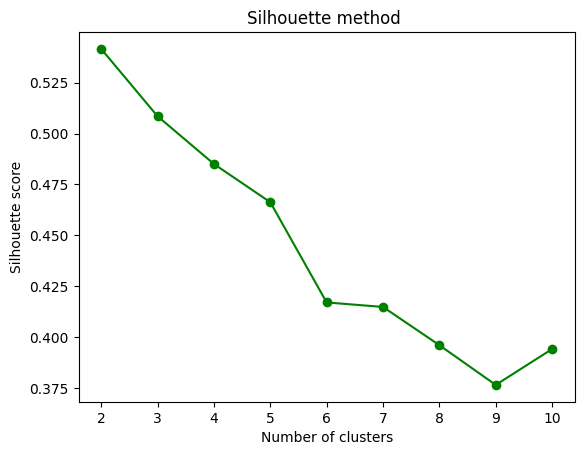

In [50]:
# plot the K vs S_score graph 
plt.plot(range_of_clusters, ss ,'g-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette method ')
plt.show()

Based on this silhouette analysis, K=3 would be the optimal number of clusters since it has a good silhouette score (0.50), indicating the best-defined cluster separation.

In [51]:
# lets build the model with K=3
km_model = KMeans(n_clusters = 3, max_iter= 50)
km_model.fit(rfm_df_scaled)
km_model.labels_

array([2, 1, 0, ..., 2, 0, 0])

In [52]:
# assign the cluster ids (labels) to the customer ids 
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [53]:
grouped_df['ClusterID'] = km_model.labels_
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


# STEP 6: Cluster Analysis

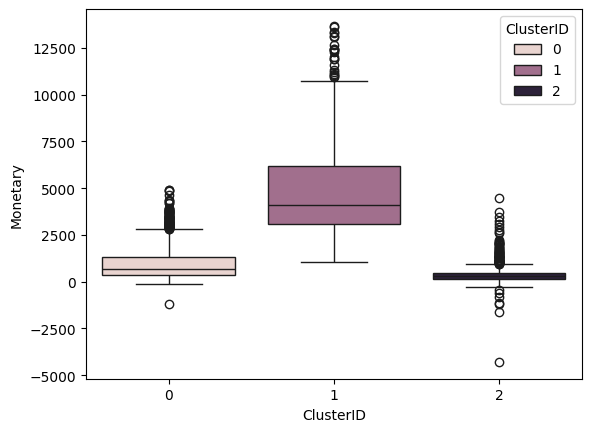

In [54]:
# use boxplot for cluster analysis 
sns.boxplot(x ='ClusterID', y = 'Monetary', data= grouped_df, hue = 'ClusterID')
plt.show()

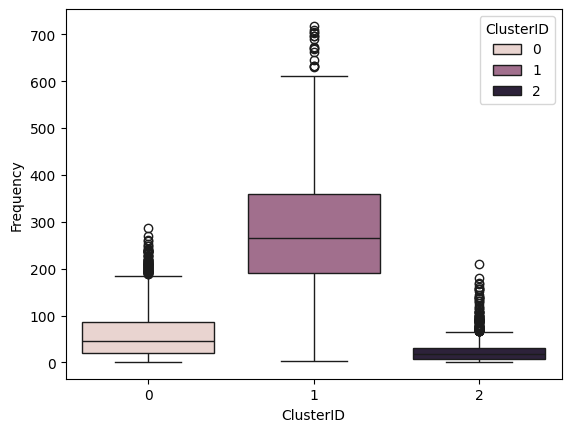

In [55]:
sns.boxplot(x='ClusterID', y= 'Frequency', data= grouped_df, hue = 'ClusterID')
plt.show()

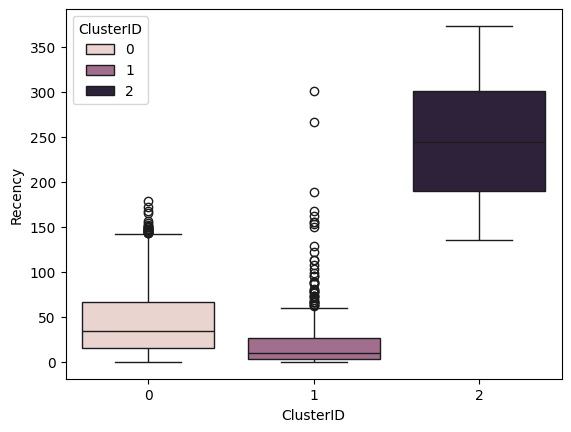

In [56]:
sns.boxplot(x= 'ClusterID', y= 'Recency', data= grouped_df , hue = 'ClusterID')
plt.show()

<u>ANALYSIS :</u>
1. Cluster ID = 2 has customers with high amount of transactions, more frequently and recently
2. Cluster ID = 1 has customers with low amount of transaction & have least frequency and no recency
3. Cluster ID = 0 has customers with a bit higher amount of transactions & have frequancy and recency higher than Cluster ID = 1 

# Hierarchical clustering 

In [58]:
from scipy.cluster.hierarchy import linkage , dendrogram , cut_tree

In [59]:
# data used for hierarchical clustering 
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,2.301611,-0.752888,-0.723738
1,-0.906466,1.042467,1.731617
2,-0.183658,-0.463636,0.300128
3,-0.738141,-0.044720,0.277517
4,2.143188,-0.603275,-0.533235


In [61]:
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


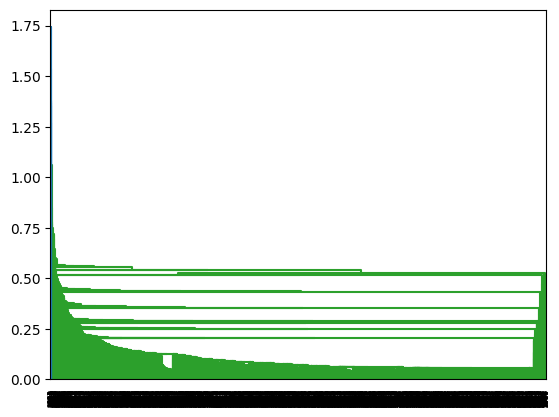

In [64]:
# using single linkage method 
merging = linkage(rfm_df_scaled, method = 'single', metric = 'euclidean')

# plot dendrogram 
dendrogram(merging)
plt.show()

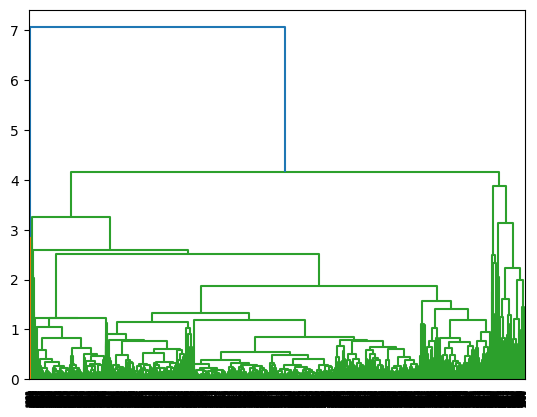

In [68]:
# using avg linkage  
merging2 = linkage(rfm_df_scaled, method='average', metric = 'euclidean')
dendrogram(merging2)
plt.show()

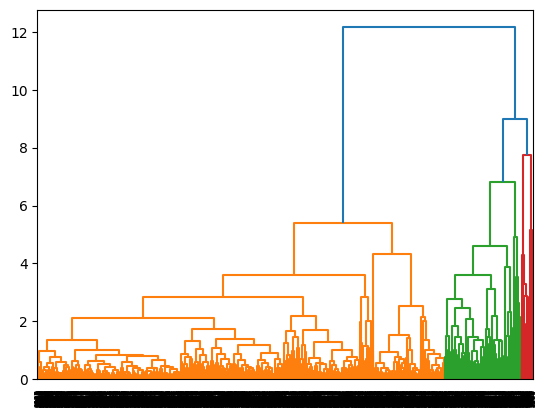

In [70]:
# using complete linkage 
merging3 = linkage(rfm_df_scaled, method = 'complete', metric= 'euclidean')
dendrogram(merging3)
plt.show()

Since out of all the linkages, complete linkage has formed a good dendrogram and cut the tree based on that merging 

In [72]:
cluster_id_hierarchy = cut_tree(merging3, n_clusters = 3)
cluster_id_hierarchy

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [74]:
cluster_id_hierarchy.shape

(4293, 1)

In [81]:
cluster_id_hierarchy = cluster_id_hierarchy.reshape(-1, )
cluster_id_hierarchy.shape

(4293,)

In [86]:
# concat this into grouped df
grouped_df['cluster_id_hierarchy'] = cluster_id_hierarchy
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID,cluster_id_hierarchy
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


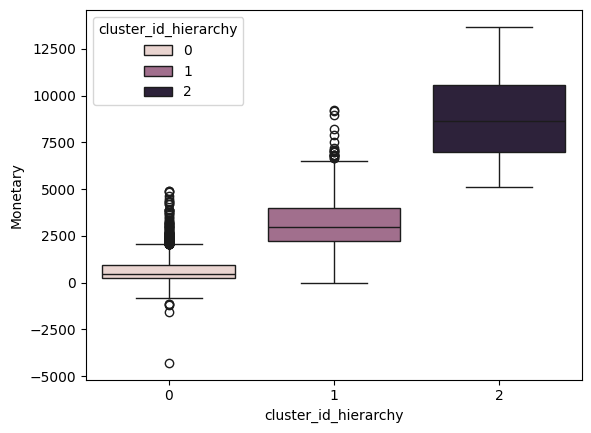

In [89]:
# use boxplots to analyse the clusters 
sns.boxplot(x = 'cluster_id_hierarchy', y = 'Monetary', data= grouped_df, hue = 'cluster_id_hierarchy')
plt.show()

<Axes: xlabel='cluster_id_hierarchy', ylabel='Recency'>

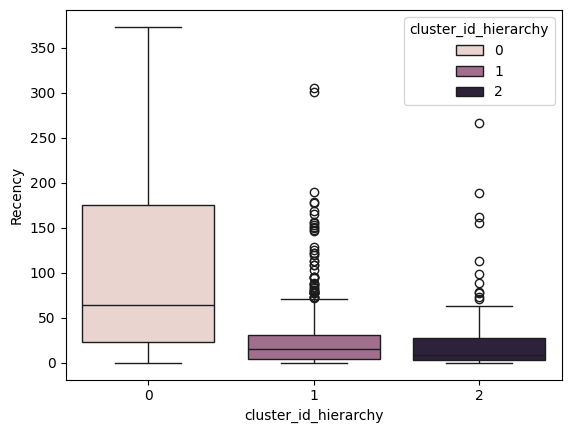

In [90]:
sns.boxplot(x= 'cluster_id_hierarchy', y = 'Recency', data = grouped_df, hue = 'cluster_id_hierarchy')

<Axes: xlabel='cluster_id_hierarchy', ylabel='Frequency'>

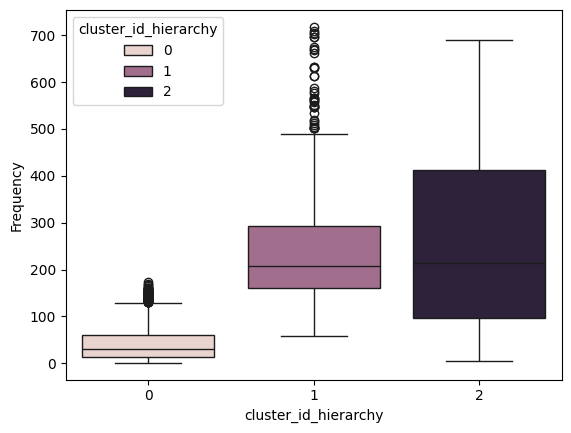

In [91]:
sns.boxplot(x= 'cluster_id_hierarchy', y= 'Frequency', data= grouped_df, hue='cluster_id_hierarchy')

### <u>Hierarchical clustering analysis </u>
    Cluster 0 : low value customers due to least monetary , recency and frequency.
    Cluster 1 : moderate value customers as they have better monetary , recency and frequency compared to Cluster 0.
    Cluster 2 : high value customers due to their contribution in high monetary , recency and frequency among others in the data .